In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv("cleanedSample.csv",low_memory=False)

In [4]:
numerical_data = df[['Longitude', 'Latitude']]
categorical_data = df[['Day', 'Violation Code', 'Street']]

In [5]:
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

In [6]:
data_scaled = pd.concat([pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns), categorical_data], axis=1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 465143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 465143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 465143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 465143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 465143.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2777, cost: 445173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 230, cost: 457494.0
Init: initializing centroids
Init: initializing clusters
Starti

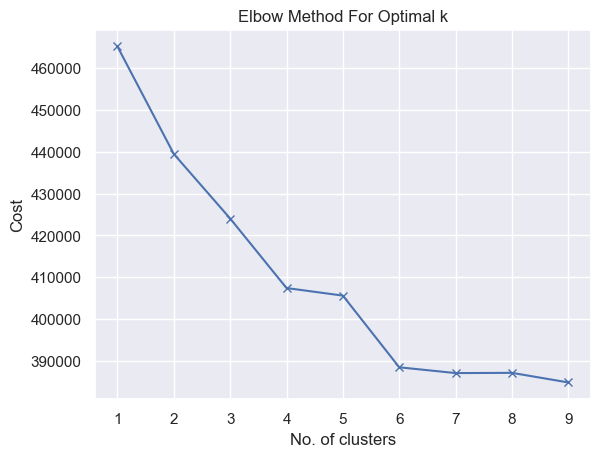

In [7]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_scaled)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
kmodes = KModes(n_clusters = 7, init = "random", n_init = 5, verbose=1)
kmodes.fit_predict(data_scaled)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10591, cost: 388334.0
Run 1, iteration: 2/100, moves: 75, cost: 388334.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8732, cost: 401336.0
Run 2, iteration: 2/100, moves: 32, cost: 401336.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15442, cost: 401701.0
Run 3, iteration: 2/100, moves: 1130, cost: 401701.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 20862, cost: 406720.0
Run 4, iteration: 2/100, moves: 7185, cost: 406720.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12601, cost: 389174.0
Run 5, iteration: 2/100, moves: 1145, cost: 389174.0
Best run was number 1


array([2, 3, 0, ..., 0, 1, 0], dtype=uint16)

In [9]:
labels = kmodes.labels_
data_scaled['Cluster'] = labels

<Axes: xlabel='Longitude', ylabel='Latitude'>

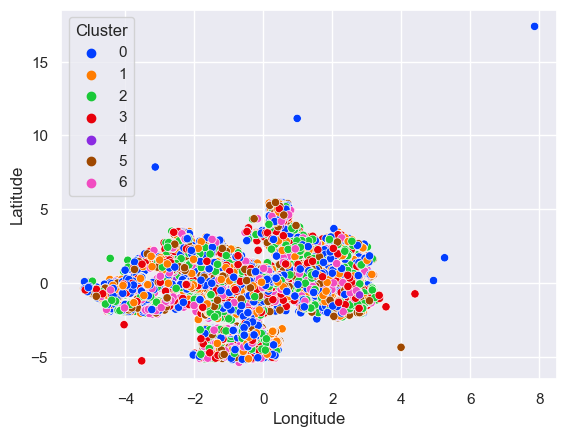

In [10]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=data_scaled, palette=palette)

In [12]:
cluster_modes = data_scaled.groupby('Cluster').apply(lambda x: x.mode().iloc[0])
print(cluster_modes)


0        Longitude  Latitude        Day Violation Code         Street  Cluster
Cluster                                                                       
0        -0.107668  0.133227  Wednesday              1  Bannatyne AVE        0
1         0.386613  0.189173    Tuesday            P01  Bannatyne AVE        1
2        -0.107668  0.159728     Friday              1     Carlton ST        2
3        -0.004693  0.165617   Thursday              1    Hargrave ST        3
4         0.081807 -0.237782  Wednesday            P28       Young ST        4
5         0.617278 -0.314340     Monday             38    William AVE        5
6         0.621397 -0.314340     Sunday             34    William AVE        6
